In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sn
import sys
from pathlib import Path

# import custom functions from src folder
module_path = str(Path.cwd() / "src")

if module_path not in sys.path:
    sys.path.append(module_path)

from robot import Robot

## The toy experiment
The ATLAS detector and the physics involved are insanely complicated. We will make our life easier by designing a toy project to explore ideas in a controlled environment.

### The problem
A scientist is faced with a strange challenge she has recieved from her eccentric colleague in the robotics-department. He has given her a big square machine which she can not open. It is supplied with electricity and is mounted on a table. 

<p align="center">
  <img src="../fig/toy_experiment_fig1.png" height="250">
</p>

The interface of the machine is very simple:

- There is a screen showing an xy-coordinate system. She can record any position on this screen by any means she wants.
- There are two big buttons which can light up. One is red and one is green. If she pushes one of the buttons, a red dot appears on the screen in what appears to be a new location each time.

<p align="center">
  <img src="../fig/toy_experiment_machine.png" height="250">
</p>

- There is another button with the text ´start simulation´. If she pushes this button one of the two colors light up and then a red dot appears on the screen. This is repeated 100 times. If she pushes it again a new sequence appears.

<p align="center">
  <img src="../fig/toy_experiment_simulate.png" height="350">
</p>

As she is a scientist she believes that she should be able to at least figure _something_ out about this machine by exploring the statistical properties of the observed output.

Her eccentric friend has said that if she can make a fair estimate of the probabilistic mathematical relationship between the color which lights up and the coordinate which is shown she has won the first part of the challenge. He gives her a few hints:

- The relationship between the color and the coordinates is non-deterministic, but there is a logical relationship where color implies coordinate.
- Pressing the simulation-button produces output which are all drawn from the same distribution and is not ordered. Each run is exchangeable and each individual set of color-coordinate pairs is exchangeable.
- Pressing a color button gives us a way to decide the color and sample from the coordinate-distribution of that color.

Mathematically this can be written as:

$P(c_j), c_j \in {red, green}$ 

$0 \lt P(c_j | x, y) \lt P(c_j) < 1$

$P(red) + P(green) = 1$

$P(x_{m}, y_{m} | x_n, y_n) = P(x_{m}, y_{m}), m \neq n$

$P(x, y | c)$



### The experiment

It takes a long time to manually record the results, and she has other things to do so she wants to minimize the time she spends on this experiment. Still, she asks her master students to spend some hours collecting a fair amount of data. To get the probabilities which quantify how fast she is learning, she uses the process of Bayesian inference to update her knowledge. But these calculations take a long time, so she can't use all the data they gathered, and the uncertainties are large... She would like to figure out if machine learning can help her in this project.

In [13]:
# Create robot object
myRobot = Robot(seed=24)

In [14]:
# Custom plot function
def plot_data(df):

    fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 6))

    max_x1 = max(abs(df["x1"].values))
    max_x2 = max(abs(df["x2"].values))

    df_red = df[df["color"] == "red"]
    sn.scatterplot(df_red, x="x1", y = "x2", c="red", alpha=0.1, ax=ax[0][0])
    sn.histplot(df_red, x="x1", color="red", ax=ax[0][1])
    sn.histplot(df_red, x="x2", color="red", ax=ax[0][2])
    
    df_green = df[df["color"] == "green"]
    sn.scatterplot(df_green, x="x1", y = "x2", c="green", alpha=0.1, ax=ax[1][0])
    sn.histplot(df_green, x="x1", color="green", ax=ax[1][1])
    sn.histplot(df_green, x="x2", color="green", ax=ax[1][2])
    
    for axis in ax:
        axis[0].set_xlim(-max_x1, max_x1)
        axis[0].set_ylim(-max_x2, max_x2)
        axis[1].set_xlim(-max_x1, max_x1)
        axis[2].set_xlim(-max_x2, max_x2)

    return fig, ax

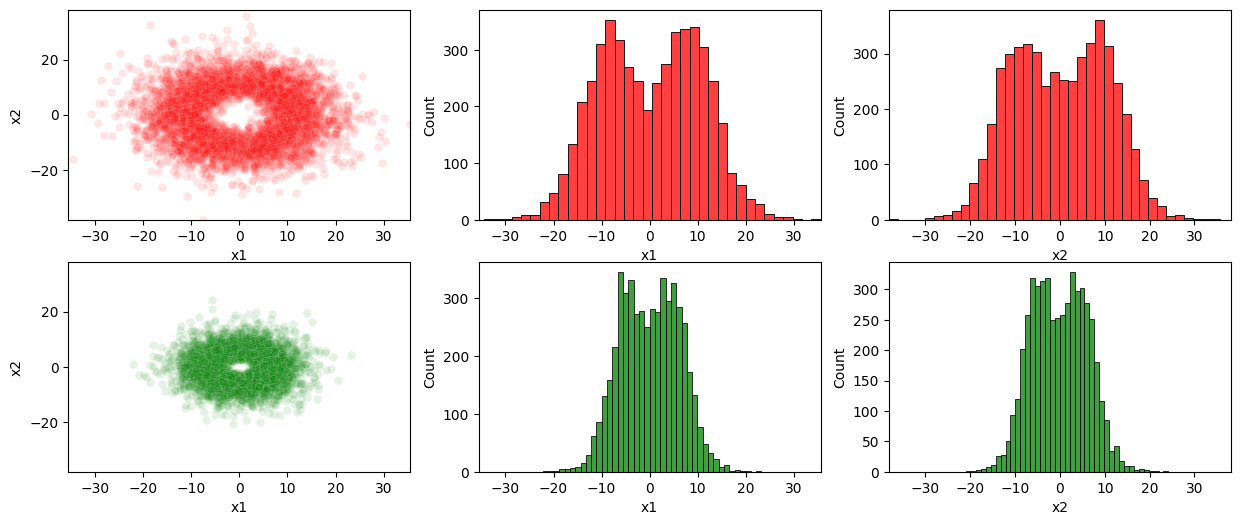

In [15]:
df_simulate = myRobot.simulate(n=10000, mode="mixed")
fig, ax = plot_data(df_simulate)

In [16]:
# Generate training data
df_cal = myRobot.simulate(n=2000, mode="mixed")
df_train = myRobot.simulate(n=2000, mode="mixed")

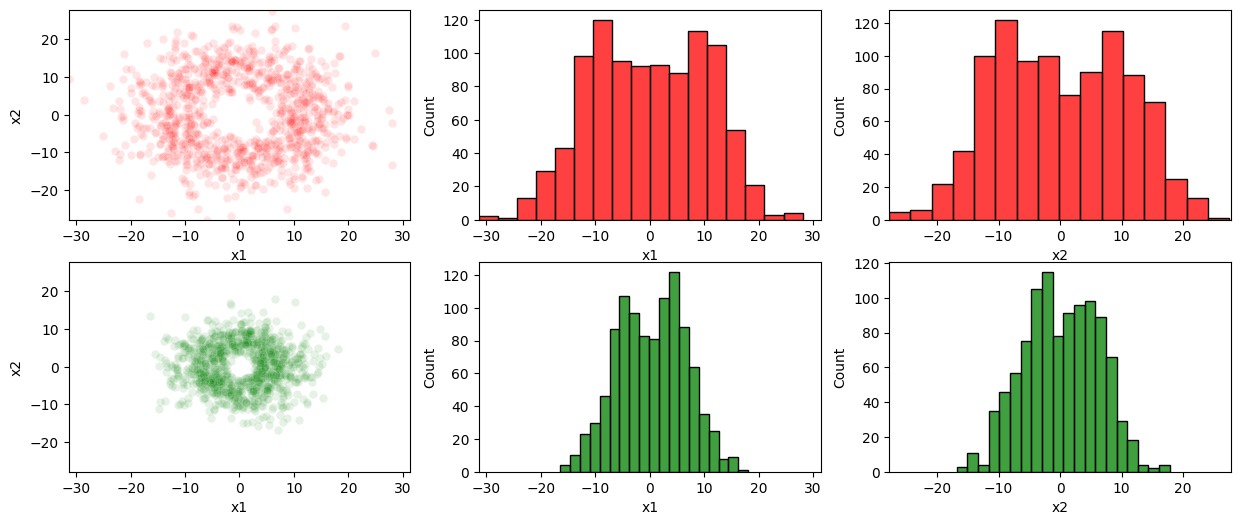

In [17]:
fig, ax = plot_data(df_cal)

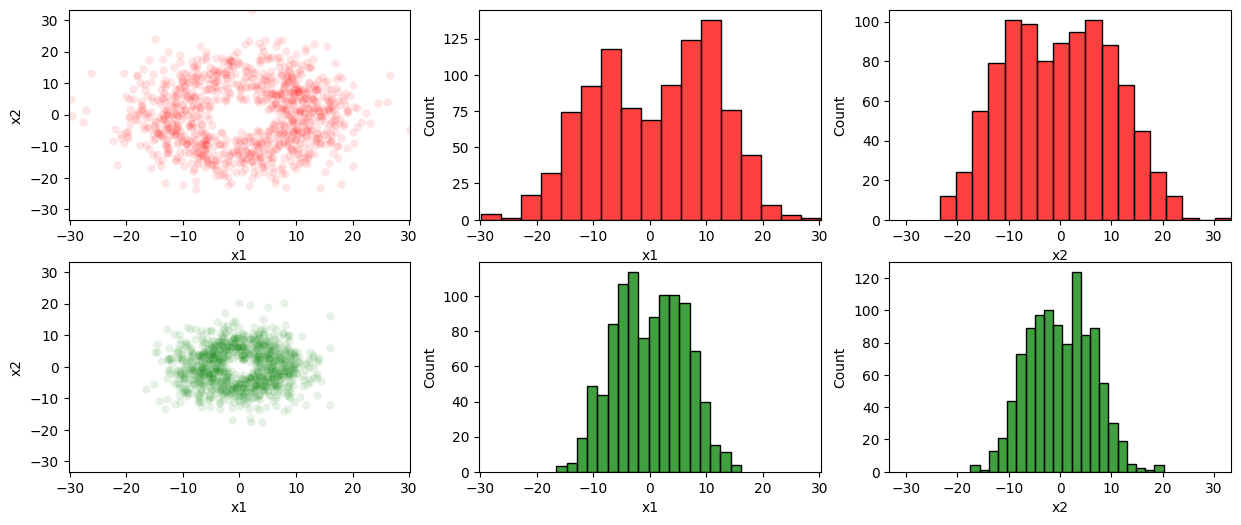

In [18]:
fig, ax = plot_data(df_train)

In [19]:
df_test = myRobot.gen_testdata(2000, 6, black_box=False)

In [20]:
# Save data
df_train.to_csv("data/train.csv", index=False)
df_cal.to_csv("data/cal.csv", index=False)
df_test.to_csv("data/test.csv", index=False)